# Uber Analysis

**Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


#avoid warnings
warnings.filterwarnings('ignore')

## Read data

In [6]:
df = pd.read_csv('uber-raw-data-apr14.csv', parse_dates=['Date/Time'])

In [8]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [7]:
df.shape

(564516, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


In [24]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
days                  int64
weekdays              int64
hours                 int64
dtype: object

## Create new Features Base on date/time

In [22]:
df['days'] = df['Date/Time'].dt.day
df['weekdays']= df['Date/Time'].dt.weekday
df['hours'] = df['Date/Time'].dt.hour

In [23]:
df.head()

,Date/Time,Lat,Lon,Base,days,weekdays,hours
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


## EDA

#### Analyze Base

In [114]:
df['Base'].value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

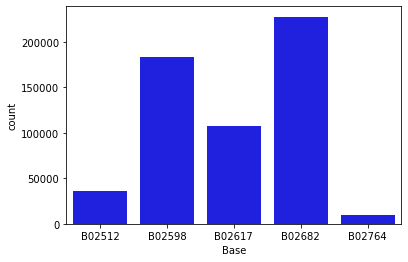

In [123]:
sns.countplot(df['Base'], color ='blue');

#### Analyze the days

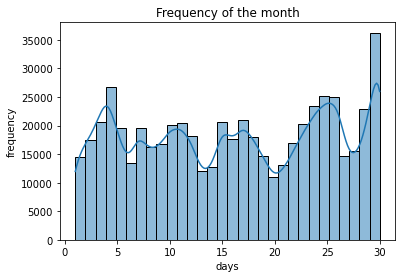

In [29]:
sns.histplot(df['days'],bins = 30,  kde=True )
plt.title('Frequency of the month')
plt.ylabel('frequency')
plt.show()

In [30]:
df.groupby('days').size()

days
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

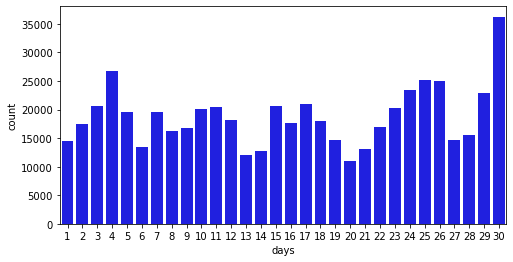

In [39]:
plt.figure(figsize = [8,4])
sns.countplot(df['days'], color = 'blue')
plt.show()

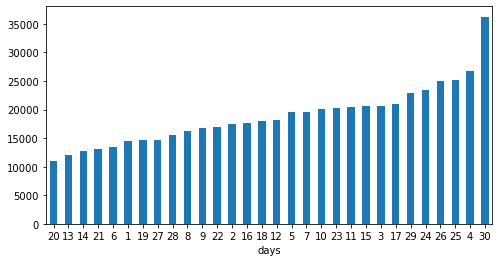

In [47]:
plt.figure(figsize = [8,4])
df.groupby('days').size().sort_values().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.show()

#### Analyze the Hour

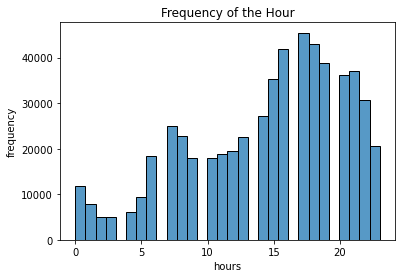

In [50]:
sns.histplot(df['hours'],bins = 30)
plt.title('Frequency of the Hour')
plt.ylabel('frequency')
plt.show()

#### Analyze the Weekdays

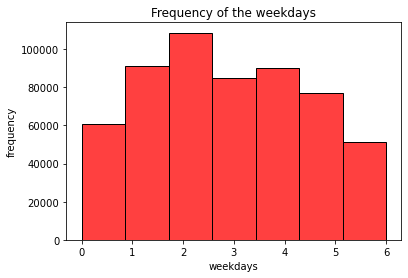

In [57]:
sns.histplot(df['weekdays'],bins = 7, color= 'red')
plt.title('Frequency of the weekdays')
plt.ylabel('frequency')
plt.show()

### Cross Analyze 

#### Days and hour

In [78]:
days_hours = df.groupby(['days'], as_index=False)['hours'].mean()
days_hours.head()

,days,hours
0,1,13.940946
1,2,14.088818
2,3,15.214337
3,4,15.216141
4,5,15.728856


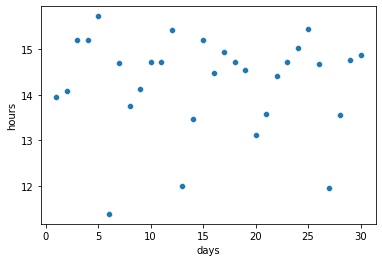

In [79]:
sns.scatterplot(days_hours['days'], days_hours['hours']);

In [88]:
def count_rows(rows):
    return len(rows)

In [93]:
 
correlations = df.groupby('weekdays hours'.split()).apply(count_rows).unstack()
correlations

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekdays,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


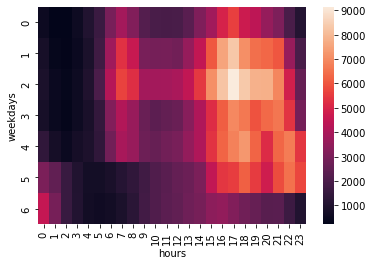

In [94]:
sns.heatmap(correlations);

#### Lat And Long

In [95]:
df.head()

,Date/Time,Lat,Lon,Base,days,weekdays,hours
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


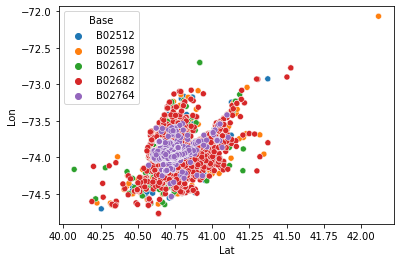

In [124]:
sns.scatterplot(df['Lat'], df['Lon'], hue=df['Base']);